In [8]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np

import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, stats


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'est1'
titulo = '41 - Estadística Unidimensional'
curso = '1BC'


x,y = symbols('x, y', real=True)

%matplotlib inline


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [18]:
def analisis_discreto(texto_ejercicio, str_datos, n_ejercicio='_'):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición P70, Q1, Q3, D4',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'h_i':np.unique(datos, return_counts=True)[1]/len(datos), 'H_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \includegraphics[width=1\columnwidth]{%s}" % n_ejercicio)

    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


In [3]:
def analisis_agrupado(texto_ejercicio, str_datos, n_ejercicio='_', bin_size = 10 ):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    
    display(datos)
    
    #dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins=round((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))
    dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins = np.arange(5*int(datos.min()/5), 5*(int(datos.max()/5)+1)+bin_size,bin_size))

    display(dfrec, dagr, )

    display([dagr[i]+bin_size/2 for i in range(len(dagr)-1)])

    marca = [dagr[i]+bin_size/2 for i in range(len(dagr)-1)]

    datos2=[]
    [datos2.append(np.ones(j)*marca[i]) for i, j in enumerate(dfrec) ]
    #datos2.append([np.ones(j)*marca[i] for i, j in enumerate(dfrec) ])


    datos2 = np.concatenate(datos2)
    display(datos2)
    datos = datos2
    display(5*int(datos.min()/5),5*(int(datos.max()/5)+1),int((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))

    #display(np.array(datos2))

    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'r_i':np.unique(datos, return_counts=True)[1]/len(datos), 'R_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \includegraphics[width=1\columnwidth]{%s}" % n_ejercicio)

    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75)})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
0,1,1,0.029412,0.029412,2.941176,2.941176
1,2,3,0.058824,0.088235,5.882353,8.823529
2,3,6,0.088235,0.176471,8.823529,17.647059
3,2,8,0.058824,0.235294,5.882353,23.529412
4,3,11,0.088235,0.323529,8.823529,32.352941
5,6,17,0.176471,0.500000,17.647059,50.000000
6,5,22,0.147059,0.647059,14.705882,64.705882
7,6,28,0.176471,0.823529,17.647059,82.352941
8,3,31,0.088235,0.911765,8.823529,91.176471


{'media': 5.294117647058823,
 'mediana': 5.5,
 'moda': ModeResult(mode=array([5]), count=array([6]))}

{'P70': 7.0, 'Q1': 4.0, 'Q3': 7.0, 'D4': 5.0}

{'rango': 10,
 'varianza': 6.031141868512111,
 'desviación típica': 2.45583832295860,
 'coeficiente variación': 0.463880572114402}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
10,2,2,0.083333,0.083333,8.333333,8.333333
11,4,6,0.166667,0.250000,16.666667,25.000000
12,3,9,0.125000,0.375000,12.500000,37.500000
13,2,11,0.083333,0.458333,8.333333,45.833333
14,3,14,0.125000,0.583333,12.500000,58.333333
15,2,16,0.083333,0.666667,8.333333,66.666667
16,4,20,0.166667,0.833333,16.666667,83.333333
17,2,22,0.083333,0.916667,8.333333,91.666667
18,2,24,0.083333,1.000000,8.333333,100.000000


{'media': 13.833333333333334,
 'mediana': 14.0,
 'moda': ModeResult(mode=array([11]), count=array([4]))}

{'P70': 16.0, 'Q1': 11.75, 'Q3': 16.0, 'D4': 13.0}

{'rango': 8,
 'varianza': 6.222222222222221,
 'desviación típica': 2.49443825784929,
 'coeficiente variación': 0.180320837916816}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
157,1,1,0.033333,0.033333,3.333333,3.333333
159,1,2,0.033333,0.066667,3.333333,6.666667
161,1,3,0.033333,0.100000,3.333333,10.000000
162,2,5,0.066667,0.166667,6.666667,16.666667
163,2,7,0.066667,0.233333,6.666667,23.333333
164,1,8,0.033333,0.266667,3.333333,26.666667
166,3,11,0.100000,0.366667,10.000000,36.666667
167,3,14,0.100000,0.466667,10.000000,46.666667
168,3,17,0.100000,0.566667,10.000000,56.666667


{'media': 168.5,
 'mediana': 168.0,
 'moda': ModeResult(mode=array([166]), count=array([3]))}

{'P70': 172.0, 'Q1': 164.5, 'Q3': 172.75, 'D4': 167.0}

{'rango': 27,
 'varianza': 34.31666666666667,
 'desviación típica': 5.85804290413331,
 'coeficiente variación': 0.0347658332589514}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
1,1,1,0.033333,0.033333,3.333333,3.333333
2,1,2,0.033333,0.066667,3.333333,6.666667
3,3,5,0.100000,0.166667,10.000000,16.666667
4,1,6,0.033333,0.200000,3.333333,20.000000
5,2,8,0.066667,0.266667,6.666667,26.666667
6,2,10,0.066667,0.333333,6.666667,33.333333
7,1,11,0.033333,0.366667,3.333333,36.666667
8,2,13,0.066667,0.433333,6.666667,43.333333
9,1,14,0.033333,0.466667,3.333333,46.666667


{'media': 9.366666666666667,
 'mediana': 10.0,
 'moda': ModeResult(mode=array([10]), count=array([5]))}

{'P70': 12.0, 'Q1': 5.25, 'Q3': 12.0, 'D4': 8.0}

{'rango': 19,
 'varianza': 24.232222222222227,
 'desviación típica': 4.92262351010335,
 'coeficiente variación': 0.525546993961212}

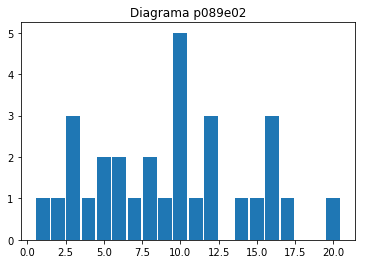

In [19]:
df_ejercicios = pd.DataFrame()

lista_problemas = [
                  ['p089e01','Las calificaciones de un grupo de 34 alumnos han sido: ',r"9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2"],
                  ['p089e03','Estos datos reflejan el tiempo, en minutos, que tardan en llegar a su centro escolar varios alumnos. ',r"10 15 11 11 14 14 11 14 17 11 17 15 10 16 12 12 13 16 13 16 18 12 18 16"],
                  ['p089e04','La altura en cm de 30 alumnos de un curso son:',r"""174 157 168 166 169 168 173 184 176 171 172 168 
                  167 162 162 163 166 166 167 167 
                  174 159 170 172 173 164 161 163 176 177"""],
                  ['p089e02', """En un grupo de personas de 1º de Bachillerato hemos preguntado por el número medio de días que
                    practican deporte al mes. Las respuestas han sido las siguientes:""",
                  """16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12"""]
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



array([174, 157, 168, 166, 169, 168, 173, 184, 176, 171, 172, 168, 167,
       162, 162, 163, 166, 166, 167, 167, 174, 159, 170, 172, 173, 164,
       161, 163, 176, 177])

array([ 2,  6, 10,  8,  3,  1])

array([155, 160, 165, 170, 175, 180, 185])

array([157.5, 157.5, 162.5, 162.5, 162.5, 162.5, 162.5, 162.5, 167.5,
       167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5,
       172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 177.5,
       177.5, 177.5, 182.5])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
157.5,2,2,0.066667,0.066667,6.666667,6.666667
162.5,6,8,0.200000,0.266667,20.000000,26.666667
167.5,10,18,0.333333,0.600000,33.333333,60.000000
172.5,8,26,0.266667,0.866667,26.666667,86.666667
177.5,3,29,0.100000,0.966667,10.000000,96.666667
182.5,1,30,0.033333,1.000000,3.333333,100.000000


{'media': 168.66666666666666,
 'mediana': 167.5,
 'moda': ModeResult(mode=array([167.5]), count=array([10]))}

{'Q1': 163.75, 'Q3': 172.5}

{'rango': 25.0,
 'varianza': 34.47222222222222,
 'desviación típica': 5.87130498460285,
 'coeficiente variación': 0.0348101086043647}

array([15, 76, 29, 35, 75, 31, 18, 19, 52, 23, 15, 46, 73, 23, 18, 81, 35,
       17, 19, 81, 35, 27, 15, 62, 15, 81, 44, 18, 41, 31, 63, 76, 18, 45,
       24, 27, 31, 27, 32, 32, 69, 74, 45, 15, 19, 18, 18, 31, 29, 13, 47,
       17, 18, 19, 30, 76, 82, 77, 14, 50])

array([20,  8, 10,  6,  2,  3,  7,  4])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 25., 25., 25., 25., 25., 25.,
       25., 25., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 45.,
       45., 45., 45., 45., 45., 55., 55., 65., 65., 65., 75., 75., 75.,
       75., 75., 75., 75., 85., 85., 85., 85.])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
15.0,20,20,0.333333,0.333333,33.333333,33.333333
25.0,8,28,0.133333,0.466667,13.333333,46.666667
35.0,10,38,0.166667,0.633333,16.666667,63.333333
45.0,6,44,0.100000,0.733333,10.000000,73.333333
55.0,2,46,0.033333,0.766667,3.333333,76.666667
65.0,3,49,0.050000,0.816667,5.000000,81.666667
75.0,7,56,0.116667,0.933333,11.666667,93.333333
85.0,4,60,0.066667,1.000000,6.666667,100.000000


{'media': 38.166666666666664,
 'mediana': 35.0,
 'moda': ModeResult(mode=array([15.]), count=array([20]))}

{'Q1': 15.0, 'Q3': 55.0}

{'rango': 70.0,
 'varianza': 558.3055555555554,
 'desviación típica': 23.6284903359388,
 'coeficiente variación': 0.619087083037699}

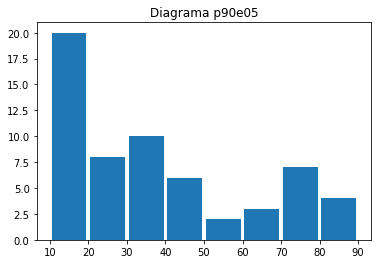

In [5]:
lista_problemas = [
                  ['p089e03b','La altura en cm de 30 alumnos de un curso son:',r"""174 157 168 166 169 168 173 184 176 171 172 168 
                  167 162 162 163 166 166 167 167 
                  174 159 170 172 173 164 161 163 176 177""", 5],
                  ['p90e05','La realización de una prueba de habilidad motora por parte de 60 niños ha dado los resultados siguientes:',
                  r"""15
76
29
35
75
31
18
19
52
23
15
46
73
23
18
81
35
17
19
81
35
27
15
62
15
81
44
18
41
31
63
76
18
45
24
27
31
27
32
32
69
74
45
15
19
18
18
31
29
13
47
17
18
19
30
76
82
77
14
50 """, 10]
                  ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_agrupado(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0], bin_size=p[3])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



array([15, 76, 29, 35, 75, 31, 18, 19, 52, 23, 15, 46, 73, 23, 18, 81, 35,
       17, 19, 81, 35, 27, 15, 62, 15, 81, 44, 18, 41, 31, 63, 76, 18, 45,
       24, 27, 31, 27, 32, 32, 69, 74, 45, 15, 19, 18, 18, 31, 29, 13, 47,
       17, 18, 19, 30, 76, 82, 77, 14, 50])

array([20,  8, 10,  6,  2,  3,  7,  4])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 25., 25., 25., 25., 25., 25.,
       25., 25., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 45.,
       45., 45., 45., 45., 45., 55., 55., 65., 65., 65., 75., 75., 75.,
       75., 75., 75., 75., 85., 85., 85., 85.])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
15.0,20,20,0.333333,0.333333,33.333333,33.333333
25.0,8,28,0.133333,0.466667,13.333333,46.666667
35.0,10,38,0.166667,0.633333,16.666667,63.333333
45.0,6,44,0.100000,0.733333,10.000000,73.333333
55.0,2,46,0.033333,0.766667,3.333333,76.666667
65.0,3,49,0.050000,0.816667,5.000000,81.666667
75.0,7,56,0.116667,0.933333,11.666667,93.333333
85.0,4,60,0.066667,1.000000,6.666667,100.000000


{'media': 38.166666666666664,
 'mediana': 35.0,
 'moda': ModeResult(mode=array([15.]), count=array([20]))}

{'Q1': 15.0, 'Q3': 55.0}

{'rango': 70.0,
 'varianza': 558.3055555555554,
 'desviación típica': 23.6284903359388,
 'coeficiente variación': 0.619087083037699}

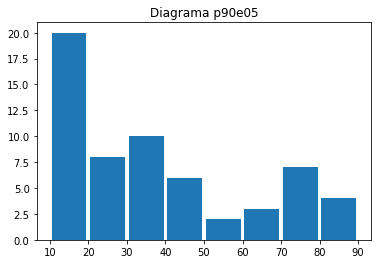

In [6]:
lista_problemas = [

                  ['p90e05','La realización de una prueba de habilidad motora por parte de 60 niños ha dado los resultados siguientes:',
                  r"""15
76
29
35
75
31
18
19
52
23
15
46
73
23
18
81
35
17
19
81
35
27
15
62
15
81
44
18
41
31
63
76
18
45
24
27
31
27
32
32
69
74
45
15
19
18
18
31
29
13
47
17
18
19
30
76
82
77
14
50 """, 10]
                  ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_agrupado(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0], bin_size=p[3])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



In [7]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
1,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e01},Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 5.294117647058823, 'mediana': 5.5, '...",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
3,Calcular los parámetros de posición,Calcular los parámetros de posición,"{'Q1': 4.0, 'Q3': 7.0}",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 10, 'varianza': 6.031141868512111, '...",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
5,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,"Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
6,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e02},"Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
7,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 13.833333333333334, 'mediana': 14.0,...","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
8,Calcular los parámetros de posición,Calcular los parámetros de posición,"{'Q1': 11.75, 'Q3': 16.0}","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
9,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 8, 'varianza': 6.222222222222221, 'd...","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False


In [20]:
df_ejercicios.to_csv('ejercicios41.csv', index = False)

In [21]:
df_ejercicios = pd.read_csv('ejercicios41.csv', index_col= None)

In [22]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p089e01

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
1,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e01},Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 5.294117647058823, 'mediana': 5.5, '...",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 7.0, 'Q1': 4.0, 'Q3': 7.0, 'D4': 5.0}",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 10, 'varianza': 6.031141868512111, '...",Las calificaciones de un grupo de 34 alumnos h...,1BC,41 - Estadística Unidimensional,p089e01,1,1,1,False,False


**Ejercicio: **p089e02

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,En un grupo de personas de 1º de Bachillerato ...,1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
16,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e02},En un grupo de personas de 1º de Bachillerato ...,1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
17,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 9.366666666666667, 'mediana': 10.0, ...",En un grupo de personas de 1º de Bachillerato ...,1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
18,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 12.0, 'Q1': 5.25, 'Q3': 12.0, 'D4': 8.0}",En un grupo de personas de 1º de Bachillerato ...,1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False
19,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 19, 'varianza': 24.232222222222227, ...",En un grupo de personas de 1º de Bachillerato ...,1BC,41 - Estadística Unidimensional,p089e02,1,1,1,False,False


**Ejercicio: **p089e03

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
5,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,"Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e03,1,1,1,False,False
6,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e03},"Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e03,1,1,1,False,False
7,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 13.833333333333334, 'mediana': 14.0,...","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e03,1,1,1,False,False
8,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 16.0, 'Q1': 11.75, 'Q3': 16.0, 'D4': 1...","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e03,1,1,1,False,False
9,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 8, 'varianza': 6.222222222222221, 'd...","Estos datos reflejan el tiempo, en minutos, qu...",1BC,41 - Estadística Unidimensional,p089e03,1,1,1,False,False


**Ejercicio: **p089e04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
10,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,La altura en cm de 30 alumnos de un curso son:...,1BC,41 - Estadística Unidimensional,p089e04,1,1,1,False,False
11,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e04},La altura en cm de 30 alumnos de un curso son:...,1BC,41 - Estadística Unidimensional,p089e04,1,1,1,False,False
12,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 168.5, 'mediana': 168.0, 'moda': Mod...",La altura en cm de 30 alumnos de un curso son:...,1BC,41 - Estadística Unidimensional,p089e04,1,1,1,False,False
13,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 172.0, 'Q1': 164.5, 'Q3': 172.75, 'D4'...",La altura en cm de 30 alumnos de un curso son:...,1BC,41 - Estadística Unidimensional,p089e04,1,1,1,False,False
14,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 27, 'varianza': 34.31666666666667, '...",La altura en cm de 30 alumnos de un curso son:...,1BC,41 - Estadística Unidimensional,p089e04,1,1,1,False,False
